# Звіт з лабораторної роботи №7

Виконав студент групи КН-24-1 Озівський В. В.

Тема: Структури даних дерево, купа, геш-таблиця
\
Мета: засвоїти основні функції та алгоритми роботи з деревами та купою засобами Python.

### <center>Хід роботи</center>

### Бінарне дерево 

#### 1. Робота з бінарним деревом

In [8]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
class BinaryTree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if not self.root:
            self.root = Node(value)
            return
        
        def _insert(node, value):
            if value < node.value:
                if node.left is None:
                    node.left = Node(value)
                else:
                    _insert(node.left, value)
            else:
                if node.right is None:
                    node.right = Node(value)
                else:
                    _insert(node.right, value)
                    
        _insert(self.root, value)
    
    def search(self, value):
        def _search(node, value):
            if node is None:
                return False
            if node.value == value:
                return True
            if value < node.value:
                return _search(node.left, value)
            return _search(node.right, value)
        
        return _search(self.root, value)

#### 2. Метод видалення заданої гілки дерева

In [9]:
def delete_branch(self, value):
    def _delete_branch(node, parent, is_left, value):
        if node is None:
            return False
        
        if node.value == value:
            if parent is None:
                self.root = None
            elif is_left:
                parent.left = None
            else:
                parent.right = None
            return True
        
        return (_delete_branch(node.left, node, True, value) or
                _delete_branch(node.right, node, False, value))
    
    return _delete_branch(self.root, None, False, value)

BinaryTree.delete_branch = delete_branch

#### 3. Тестування коду

In [10]:
tree = BinaryTree()

values = [50, 30, 70, 20, 40, 60, 80]
for value in values:
    tree.insert(value)

print(f"Значення 30 присутнє: {tree.search(30)}")  # True
print(f"Значення 90 присутнє: {tree.search(90)}")  # False

deleted = tree.delete_branch(30)
print(f"Гілку з коренем 30 видалено: {deleted}")  # True

print(f"Значення 30 присутнє після видалення: {tree.search(30)}")  # False
print(f"Значення 20 присутнє після видалення: {tree.search(20)}")  # False
print(f"Значення 40 присутнє після видалення: {tree.search(40)}")  # False

print(f"Значення 50 присутнє: {tree.search(50)}")  # True
print(f"Значення 70 присутнє: {tree.search(70)}")  # True

Значення 30 присутнє: True
Значення 90 присутнє: False
Гілку з коренем 30 видалено: True
Значення 30 присутнє після видалення: False
Значення 20 присутнє після видалення: False
Значення 40 присутнє після видалення: False
Значення 50 присутнє: True
Значення 70 присутнє: True


#### 4. Асимптотична складність операцій з бінарним деревом:

Search (Пошук):
- У середньому випадку: O(log n)
- У найгіршому випадку: O(n)

Insert (Вставка):
- У середньому випадку: O(log n)
- У найгіршому випадку: O(n)

Delete (Видалення):
- У середньому випадку: O(log n)
- У найгіршому випадку: O(n)

### Купа

#### 1. Робота з купою

In [12]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    
    if left < n and arr[left] > arr[largest]:
        largest = left
    
    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        
        heapify(arr, n, largest)

def build_max_heap(arr):
    n = len(arr)
    
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    
    return arr

#### 2. Метод додаванння нового елемента

In [11]:
def insert_to_heap(heap, value):

    heap.append(value)

    current = len(heap) - 1

    while current > 0:
        parent = (current - 1) // 2
        
        if heap[current] > heap[parent]:
            heap[current], heap[parent] = heap[parent], heap[current]
            current = parent
        else:
            break
    
    return heap

#### 3. Метод вилучення максимального елемента

In [21]:
def extract_max(heap):

    if not heap:
        return None
    
    max_value = heap[0]
    
    heap[0] = heap[-1]
    heap.pop()

    if heap:
        heapify(heap, len(heap), 0)
    
    return max_value

#### 4. Тестування коду

In [22]:
import random

def generate_random_array(size, min_val, max_val):
    return [random.randint(min_val, max_val) for _ in range(size)]

arr = generate_random_array(10, 1, 100)
print(f"Випадковий масив: {arr}")

heap = build_max_heap(arr.copy())
print(f"Max-heap: {heap}")

heap_with_19 = insert_to_heap(heap.copy(), 19)
print(f"Max-heap після додавання 19: {heap_with_19}")
    
max_value = extract_max(heap_with_19)
print(f"Максимальний елемент (вилучено): {max_value}")
print(f"Купа після вилучення максимального елемента: {heap_with_19}")

Випадковий масив: [40, 24, 34, 38, 90, 84, 2, 97, 96, 37]
Max-heap: [97, 96, 84, 40, 90, 34, 2, 38, 24, 37]
Max-heap після додавання 19: [97, 96, 84, 40, 90, 34, 2, 38, 24, 37, 19]
Максимальний елемент (вилучено): 97
Куга після вилучення максимального елемента: [96, 90, 84, 40, 37, 34, 2, 38, 24, 19]


#### 5. Асимптотични складність операцій з купою

Search (Пошук):
- У середньому випадку: O(n)
- У найгіршому випадку: O(n)

Insert (Вставка):
- У середньому випадку: O(log n)
- У найгіршому випадку: O(log n)

Delete (Видалення максимуму):
- У середньому випадку: O(log n)
- У найгіршому випадку: O(log n)

### Геш-таблиця

#### 1. Роботи з геш-таблицею

In [3]:
class HashTable:
    def __init__(self, size: int = 10):
        self.size = size
        self.table = [[] for _ in range(self.size)]
    
    def hash_function(self, key: Any) -> int:
        return hash(key) % self.size
    
    def insert(self, key: Any, value: Any) -> None:
        hash_index = self.hash_function(key)
        
        for i, (k, v) in enumerate(self.table[hash_index]):
            if k == key:
                self.table[hash_index][i] = (key, value)
                return
        
        self.table[hash_index].append((key, value))
    
    def get(self, key: Any) -> Any:
        hash_index = self.hash_function(key)
        
        for k, v in self.table[hash_index]:
            if k == key:
                return v
                
        return None
    
    def delete(self, key: Any) -> bool:
        hash_index = self.hash_function(key)
        
        for i, (k, v) in enumerate(self.table[hash_index]):
            if k == key:
                del self.table[hash_index][i]
                return True
                
        return False

#### 2. Тестування коду

<Figure size 1000x600 with 0 Axes>

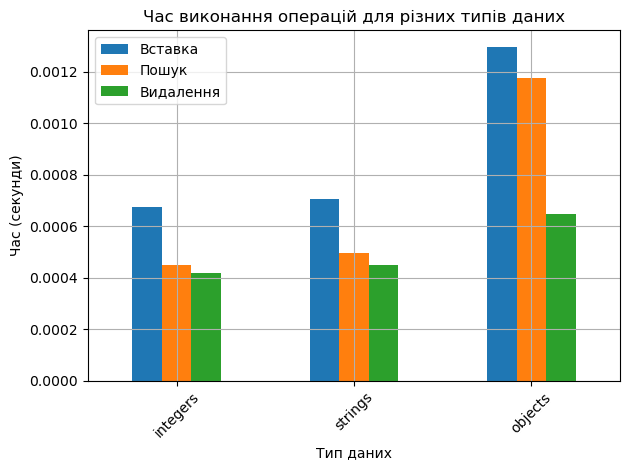

In [9]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any, Tuple

class TestObject:
    def __init__(self, value: int):
        self.value = value
    
    def __hash__(self):
        return hash(self.value)
    
    def __eq__(self, other):
        return isinstance(other, TestObject) and self.value == other.value

def generate_test_data(size: int) -> dict:
    return {
        'integers': [(i, i * 2) for i in range(size)],
        'strings': [(f'key_{i}', f'value_{i}') for i in range(size)],
        'objects': [(TestObject(i), i * 2) for i in range(size)]
    }

def test_operations(data_type: str, data: list[Tuple[Any, Any]]) -> dict:
    hash_table = HashTable(size=100)
    results = {'insert': 0, 'get': 0, 'delete': 0}
    
    start_time = time.time()
    for key, value in data:
        hash_table.insert(key, value)
    results['insert'] = time.time() - start_time
    
    start_time = time.time()
    for key, _ in data:
        hash_table.get(key)
    results['get'] = time.time() - start_time
    
    start_time = time.time()
    for key, _ in data:
        hash_table.delete(key)
    results['delete'] = time.time() - start_time
    
    return results

data_size = 1000
test_data = generate_test_data(data_size)
results = {}

for data_type, data in test_data.items():
    results[data_type] = test_operations(data_type, data)

df = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
df.plot(kind='bar')
plt.title('Час виконання операцій для різних типів даних')
plt.xlabel('Тип даних')
plt.ylabel('Час (секунди)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['Вставка', 'Пошук', 'Видалення'])
plt.tight_layout()


### Відповіді на контрольні питання

1. Чим відрізняється структура бінарне дерево від бінарного дерева пошуку?
\
Бінарне дерево — кожен вузол має до двох нащадків. Бінарне дерево пошуку (BST) — бінарне дерево, де лівий нащадок менший за вузол, правий — більший. BST забезпечує впорядкованість для ефективного пошуку.
   
2. Чим відрізняється структура бінарне дерево від бінарної купи?
\
Бінарне дерево — довільна структура з до двома нащадками. Бінарна купа — повне бінарне дерево, де кожен вузол більший (макс-купа) або менший (мін-купа) за своїх нащадків, оптимізовано для доступу до екстремуму.

3. Які існують типи дерев? Опишіть їхні основні характеристики та переваги.
- Бінарне дерево пошуку (BST): Впорядкованість, швидкий пошук/вставка (O(log n) у середньому).
- AVL-дерево: Самобалансуюче BST, гарантує O(log n) завдяки балансуванню.
- Червоно-чорне дерево: Самобалансуюче, ефективне для частих вставок/видалень, O(log n).
- B-дерево: Багато нащадків, оптимальне для дискового зберігання, O(log n).
- Купа: Повне дерево, швидкий доступ до min/max, O(log n) для вставки/видалення.
- Трі (Trie): Для рядків, швидкий пошук префіксів, O(m), де m — довжина ключа.

4. Приклади задач, які ефективно вирішуються за допомогою дерев.
- Пошук і сортування (BST).
- Автодоповнення та пошук слів (Trie).
- Індексація баз даних (B-дерево).
- Планування завдань (купа).
- Синтаксичний аналіз (дерево розбору).

5. Як організована купа? Опишіть алгоритми додавання та вилучення елементів.
\
Організація: Повне бінарне дерево, де батьківський вузол більший (макс-купа) або менший (мін-купа) за нащадків, часто реалізується як масив.
\
Додавання: Додаємо елемент у кінець, просіюємо вгору (swap із батьком, якщо порушено умову купи), O(log n).
\
Вилучення: Видаляємо корінь, переміщуємо останній елемент у корінь, просіюємо вниз (swap із більшим/меншим нащадком), O(log n).

6. Які задачі можна ефективно вирішити за допомогою купи? Приклади.
- Пріоритетні черги (планування завдань).
- Алгоритм Дейкстри (пошук найкоротшого шляху).
- Сортування (HeapSort, O(n log n)).
- Пошук k-го найбільшого/найменшого елемента.

7. Як геш-функція використовується для зберігання та пошуку даних в хеш-таблиці?
\
Геш-функція перетворює ключ у числовий індекс (hash % розмір_таблиці), визначаючи позицію для зберігання/пошуку даних. Забезпечує швидкий доступ, O(1) у середньому.

8. Методи вирішення колізій в хеш-таблицях. Переваги та недоліки.

\
Ланцюжкове хешування: Кожна комірка — список.
- Переваги: Простота, ефективність при малій кількості колізій.
- Недоліки: Деградація до O(n) при багатьох колізіях.

\
Відкрита адресація (лінійне зондування): Пошук наступної вільної комірки.
- Переваги: Менше пам’яті, немає списків.
- Недоліки: Кластеризація, погіршення продуктивності при високому заповненні.

\
Подвійне хешування: Використання другої геш-функції для зондування.
- Переваги: Менше кластеризації.
- Недоліки: Складніша реалізація, чутливість до якості геш-функцій.